<a href="https://colab.research.google.com/github/mariatreesa/DeepLearning/blob/master/Complex_Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This Notebook has the code and excercises which are part of the course 'Introduction to tensorflow' in coursera

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-07-07 23:30:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   137MB/s    in 1.0s    

2020-07-07 23:30:31 (137 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-07-07 23:30:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

The code below unzip the files and stores it in the folder structure. Two folders are created where the folder horses has the images of horses and the folder human has the imags of humans

In [6]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [8]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_horse_dir
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

['horse32-3.png', 'horse46-3.png', 'horse19-3.png', 'horse39-1.png', 'horse05-8.png', 'horse30-0.png', 'horse50-9.png', 'horse50-4.png', 'horse11-7.png', 'horse36-2.png']


View the training images

(-0.5, 299.5, 299.5, -0.5)

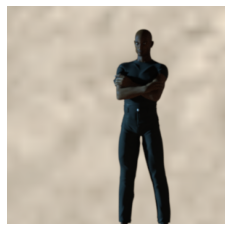

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

horse_dir = "/tmp/horse-or-human/horses"
horse_names = os.listdir(horse_dir)
imgpath = os.path.join(horse_dir,horse_names[7])
img = mpimg.imread(imgpath)
plt.imshow(img)

human_dir = "/tmp/horse-or-human/humans"
human_names = os.listdir(human_dir)
imgpath = os.path.join(human_dir,human_names[7])
img = mpimg.imread(imgpath)
plt.imshow(img)
plt.axis('off')

##Building a CNN

Data generators are used to read pictures in source folders, convert them to float32 tensors, and feed them to the model. The generator used in this code will yield images of size 300x300 and their labels. Image generator, while reading images from the folder will label the image using the folder name.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print(f'Reached {DESIRED_ACCURACY*100}% accuracy hence cancelling training')
      self.model.stop_training = True

callbacks = myCallback()
    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
    
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  # This step resize each image to 300 x 300
        batch_size=128,
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),  # This step resize each image to 300 x 300
        batch_size=32,
        class_mode='binary')

history = model.fit(
          train_generator,
          steps_per_epoch=8,  
          epochs=15,
          verbose=1,
          validation_data = validation_generator,
          validation_steps=8,
          callbacks = [callbacks])

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 6s 807ms/step - loss: 0.7677 - accuracy: 0.5729 - val_loss: 0.8498 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 829ms/step - loss: 0.6025 - accuracy: 0.6541 - val_loss: 0.6545 - val_accuracy: 0.5586
Epoch 3/15
8/8 [==============================] - 7s 829ms/step - loss: 0.6055 - accuracy: 0.7408 - val_loss: 1.0467 - val_accuracy: 0.6602
Epoch 4/15
8/8 [==============================] - 7s 831ms/step - loss: 0.2420 - accuracy: 0.9155 - val_loss: 1.8521 - val_accuracy: 0.6992
Epoch 5/15
8/8 [==============================] - 7s 831ms/step - loss: 0.1829 - accuracy: 0.9321 - val_loss: 1.2770 - val_accuracy: 0.8008
Epoch 6/15
8/8 [==============================] - 7s 835ms/step - loss: 0.1760 - accuracy: 0.9410 - val_loss: 1.3672 - val_accuracy: 0.8047
Epoch 7/15
8/8 [==============================] - 7s 817ms/step - loss: 0.145

####Testing the model

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
key, _= list(uploaded.items())[0]
print(key)
path = '/content/' + key
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

  #images = np.vstack([x])
classes = model.predict(x, batch_size=10)
print(classes[0])
if classes[0]>0.5:
  print(key + " is a human")
else:
  print(key + " is a horse")
 

Saving horse-2063672_640.jpg to horse-2063672_640.jpg
horse-2063672_640.jpg
[0.]
horse-2063672_640.jpg is a horse
